# SIR with births and natural deaths
This is the Python version of program 2.2 from page 27 of "Modeling Infectious Disease in humans and animals" by Keeling & Rohani.
This is based on code written by Ilias Soumpasis.

In [1]:
import scipy.integrate as spi
import numpy as np
import matplotlib.pyplot as plt

In [41]:
#Parameters (rates here are specified in terms of days)
beta=520/365.0  #transmission rate
gamma=1/7 #recovery rate
mu=1/(70*365.0)    #death/birth rate

TS=1.0  #time step for integration
ND=60*365 #number of days (end of simulation)


S0=0.1 #initial proportion of the population that is susceptible
I0=1e-4 #initial proportion of the population that is infected
R0=1-S0-I0  #initial proportion of the population that is immune
INPUT = (S0, I0, R0) #initial conditions

In [44]:
def diff_eqs(INP,t):  
	'''The main set of equations'''
	Y=np.zeros((3))
	V = INP    
	Y[0] = mu - beta * V[0] * V[1] -mu*V[0]
	Y[1] = beta * V[0] * V[1] - gamma * V[1] -mu*V[1]
	Y[2] = gamma * V[1]-mu*V[2]
	return Y   # For odeint

In [45]:
t_start = 0.0; t_end = ND; t_inc = TS
t_range = np.arange(t_start, t_end+t_inc, t_inc)
RES = spi.odeint(diff_eqs,INPUT,t_range)

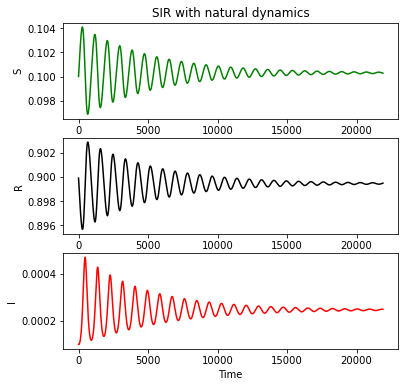

In [59]:
#Ploting
fig = plt.figure(figsize=(6,6))
plt.title('SIR with natural dynamics')
plt.axis('off')
fig.add_subplot(311)
plt.plot(RES[:,0], '-g')
plt.ylabel('S')
fig.add_subplot(312)
plt.plot(RES[:,2], '-k')
plt.ylabel('R')
fig.add_subplot(313)
plt.plot(RES[:,1], '-r')
#plt.legend(loc='best')
plt.xlabel('Time')
plt.ylabel('I')
plt.show()
fig.savefig('SIR_natural_dynamics.pdf')